In [23]:
import sys
sys.path.append("../..")

import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

from src.capture.frame_capture import CameraFrameCapture


0: 480x640 1 person, 41.1ms
Speed: 0.9ms preprocess, 41.1ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


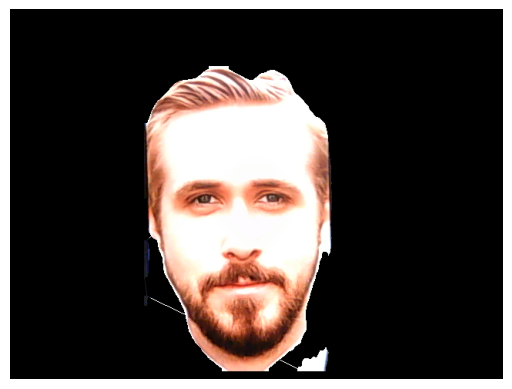

In [24]:
model = YOLO("../../src/nn/weights/segmentation/yolo11n-seg.pt")

with CameraFrameCapture() as cap:
    frame = cap.read()
    results = model.predict(frame, classes=[0])

    for result in results:
        for mask in result.masks.xy:
            points = np.array([mask], dtype=np.int32)

            image_mask = np.zeros(frame.shape[:2], dtype=np.uint8)
            cv2.fillPoly(image_mask, points, 255)

            frame = np.where(image_mask[..., np.newaxis] == 255, frame, 0)

    plt.imshow(frame)
    plt.axis('off')
    plt.show()